This tutorial notebook shows how to fit a global epistasis model to massively parallel assay data. 

In [11]:
# necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import mavenn
from mavenn.src.utils import get_example_dataset

Load data using mavenn's helper method. 

In [2]:
X, y = get_example_dataset(name='MPSA')

In [3]:
# X is an array of 9-nt sequences
X[0:10]

array(['AAAGCAAAA', 'AAAGCAAAC', 'AAAGCAAAG', 'AAAGCAAAU', 'AAAGCAACA',
       'AAAGCAACC', 'AAAGCAACG', 'AAAGCAACU', 'AAAGCAAGA', 'AAAGCAAGC'],
      dtype=object)

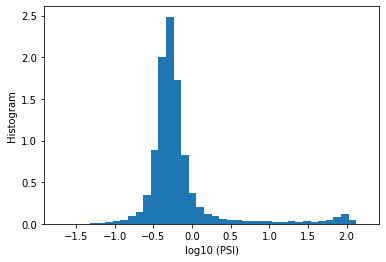

In [4]:
# y = log_10(PSI)
plt.hist(y,bins=40,density=True)
plt.xlabel('log10 (PSI)')
plt.ylabel('Histogram')
plt.show()

In [5]:
# Split data into training and test sets using sklearn
x_train, x_test, y_train, y_test = train_test_split(X, y)

## Fit GE model to data

In [6]:
GER = mavenn.Model(regression_type='GE',
                   X=x_train, 
                   y=y_train, 
                   model_type='additive',
                   learning_rate=0.005,
                   monotonic=True,
                   alphabet_dict='rna')

GER.fit(epochs=200, use_early_stopping=True, early_stopping_patience=20, verbose=1)

Train on 18717 samples, validate on 4680 samples
Epoch 1/200
18717/18717 [==============================] - 1s 65us/step - loss: 0.4312 - mean_absolute_error: 0.3925 - val_loss: 0.2252 - val_mean_absolute_error: 0.2767
Epoch 2/200
18717/18717 [==============================] - 1s 46us/step - loss: 0.1136 - mean_absolute_error: 0.2073 - val_loss: 0.0959 - val_mean_absolute_error: 0.1855
Epoch 3/200
18717/18717 [==============================] - 1s 39us/step - loss: 0.0918 - mean_absolute_error: 0.1855 - val_loss: 0.0955 - val_mean_absolute_error: 0.1833
Epoch 4/200
18717/18717 [==============================] - 1s 39us/step - loss: 0.0914 - mean_absolute_error: 0.1846 - val_loss: 0.0979 - val_mean_absolute_error: 0.1847
Epoch 5/200
18717/18717 [==============================] - 1s 38us/step - loss: 0.0912 - mean_absolute_error: 0.1845 - val_loss: 0.0953 - val_mean_absolute_error: 0.1824
Epoch 6/200
18717/18717 [==============================] - 1s 40us/step - loss: 0.0910 - mean_absolut

## Plot results

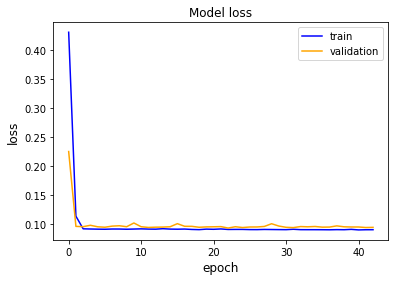

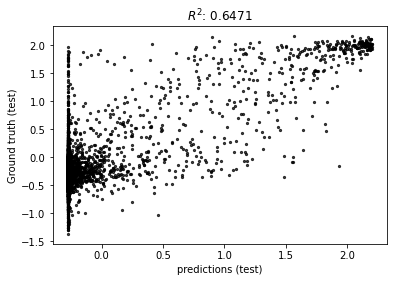

In [7]:
loss_history =  GER.model.return_loss()
predictions = GER.model.predict(x_test)

plt.plot(loss_history.history['loss'], color='blue')
plt.plot(loss_history.history['val_loss'], color='orange')
plt.title('Model loss', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.legend(['train', 'validation'])
plt.show()

Rsquared = str(np.corrcoef(predictions.ravel(),y_test)[0][1]**2)
plt.scatter(predictions,y_test,s=5, alpha=0.75, color='black')
plt.ylabel('Ground truth (test)')
plt.xlabel('predictions (test)')
plt.title('$R^2$: '+Rsquared[0:6])
plt.show()

## Plot the global epistasis non linearity 

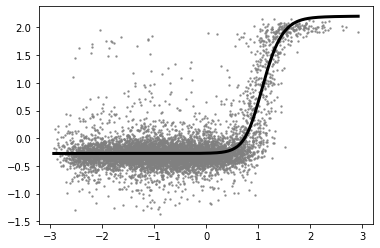

In [8]:
GE_nonlinearity, phi_range, latent_trait = GER.ge_nonlinearity(x_test)
plt.plot(phi_range,GE_nonlinearity,color='black',lw=3)
plt.scatter(latent_trait,y_test,color='gray',s=2,alpha=0.75)
plt.show()

## Fit pairwise GE model to the same data

To fit a pairwise GE model to these MPSA data, we change the model_type to 'pairwise'. We also reduce a learning rate by a small amount

In [9]:
GER_pairwise = mavenn.Model(regression_type='GE',
                   X=x_train, 
                   y=y_train, 
                   model_type='pairwise',
                   learning_rate=0.001,
                   monotonic=True,
                   alphabet_dict='rna')

GER_pairwise.fit(epochs=200, use_early_stopping=True, early_stopping_patience=20, verbose=1)

Train on 18717 samples, validate on 4680 samples
Epoch 1/200
18717/18717 [==============================] - 1s 65us/step - loss: 0.7885 - mean_absolute_error: 0.6687 - val_loss: 0.2483 - val_mean_absolute_error: 0.3204
Epoch 2/200
18717/18717 [==============================] - 1s 37us/step - loss: 0.2033 - mean_absolute_error: 0.2876 - val_loss: 0.1659 - val_mean_absolute_error: 0.2662
Epoch 3/200
18717/18717 [==============================] - 1s 41us/step - loss: 0.1127 - mean_absolute_error: 0.2226 - val_loss: 0.0926 - val_mean_absolute_error: 0.1957
Epoch 4/200
18717/18717 [==============================] - 1s 42us/step - loss: 0.0811 - mean_absolute_error: 0.1845 - val_loss: 0.0790 - val_mean_absolute_error: 0.1783
Epoch 5/200
18717/18717 [==============================] - 1s 44us/step - loss: 0.0724 - mean_absolute_error: 0.1724 - val_loss: 0.0727 - val_mean_absolute_error: 0.1694
Epoch 6/200
18717/18717 [==============================] - 1s 41us/step - loss: 0.0678 - mean_absolut

Epoch 49/200
18717/18717 [==============================] - 1s 39us/step - loss: 0.0494 - mean_absolute_error: 0.1499 - val_loss: 0.0551 - val_mean_absolute_error: 0.1559
Epoch 50/200
18717/18717 [==============================] - 1s 43us/step - loss: 0.0495 - mean_absolute_error: 0.1498 - val_loss: 0.0534 - val_mean_absolute_error: 0.1539
Epoch 51/200
18717/18717 [==============================] - 1s 37us/step - loss: 0.0494 - mean_absolute_error: 0.1500 - val_loss: 0.0536 - val_mean_absolute_error: 0.1534
Epoch 52/200
18717/18717 [==============================] - 1s 44us/step - loss: 0.0493 - mean_absolute_error: 0.1499 - val_loss: 0.0537 - val_mean_absolute_error: 0.1528
Epoch 53/200
18717/18717 [==============================] - 1s 38us/step - loss: 0.0492 - mean_absolute_error: 0.1497 - val_loss: 0.0534 - val_mean_absolute_error: 0.1530
Epoch 54/200
18717/18717 [==============================] - ETA: 0s - loss: 0.0493 - mean_absolute_error: 0.149 - 1s 56us/step - loss: 0.0493 - m

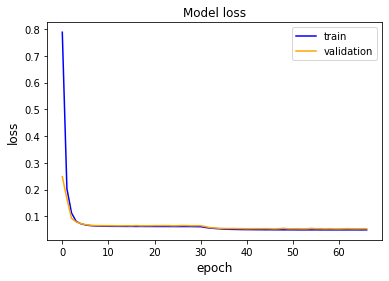

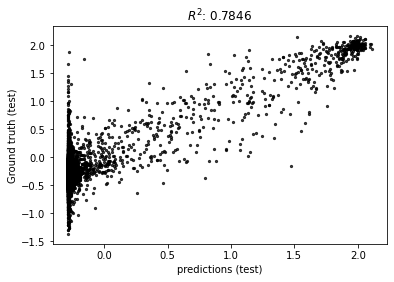

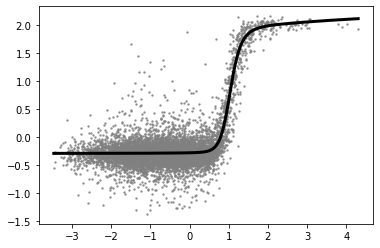

In [10]:
loss_history =  GER_pairwise.model.return_loss()
predictions = GER_pairwise.model.predict(x_test)

plt.plot(loss_history.history['loss'], color='blue')
plt.plot(loss_history.history['val_loss'], color='orange')
plt.title('Model loss', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.legend(['train', 'validation'])
plt.show()

Rsquared = str(np.corrcoef(predictions.ravel(),y_test)[0][1]**2)
plt.scatter(predictions,y_test,s=5, alpha=0.75, color='black')
plt.ylabel('Ground truth (test)')
plt.xlabel('predictions (test)')
plt.title('$R^2$: '+Rsquared[0:6])
plt.show()

GE_nonlinearity, phi_range, latent_trait = GER_pairwise.ge_nonlinearity(x_test)
plt.plot(phi_range,GE_nonlinearity,color='black',lw=3)
plt.scatter(latent_trait,y_test,color='gray',s=2,alpha=0.75)
plt.show()